# Customer Churn Analysis
This project analyzes customer churn using the **Telco Customer Churn dataset**. 
We aim to identify key factors contributing to churn and explore patterns using data visualization and statistical analysis.


In [2]:
# We automatically import the 4 basic data analysis libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



## Loading the Dataset
We begin by loading the dataset into a Pandas DataFrame to inspect its structure.


In [4]:
# Load the dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
# Let's check the dataframe, I want to see the number of raws and columns.
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Cleaning
Certain columns, such as `customerID`, may not be useful for analysis. We drop them to keep only relevant data.


In [7]:
df.duplicated().sum()

0

In [8]:
#removing the unnececary column CostumerID
df.drop(columns=['customerID'], inplace=True)

In [9]:
# find out how many null values are there in each column
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# the types of data
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# Basic statistical description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


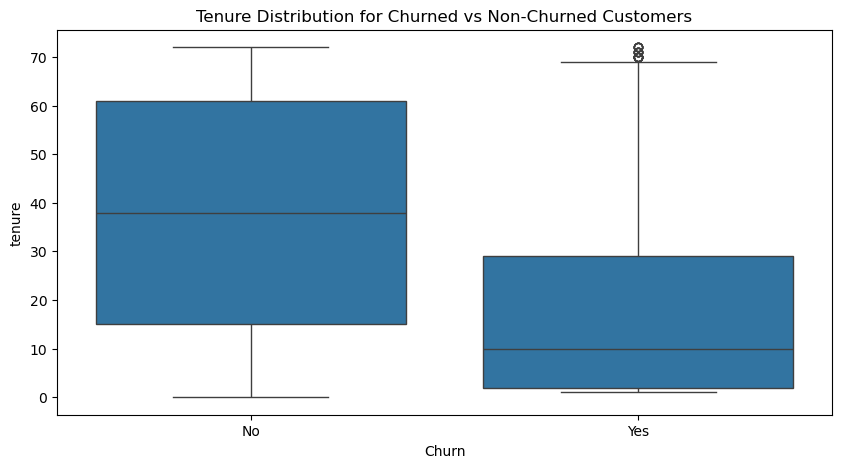

In [12]:
# 📝 Explanation: [Describe what this cell does based on your understanding.]
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Churn'], y=df['tenure'])
plt.title("Tenure Distribution for Churned vs Non-Churned Customers")
plt.show()

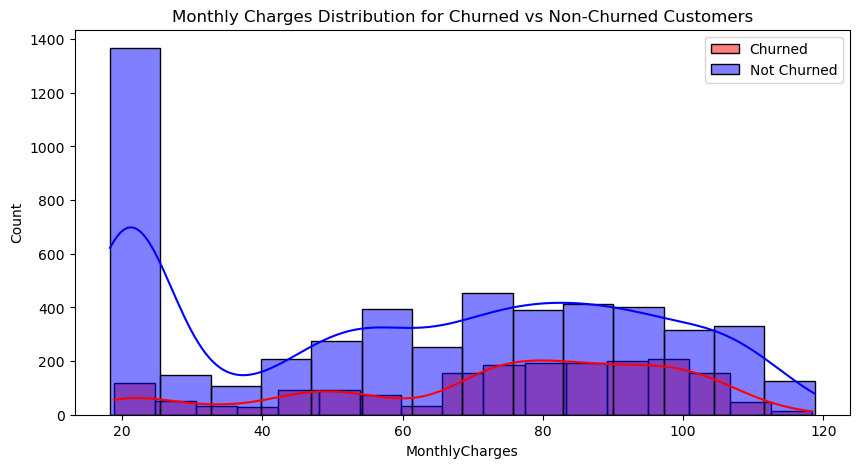

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], kde=True, color="red", label="Churned")
sns.histplot(df[df['Churn'] == 'No']['MonthlyCharges'], kde=True, color="blue", label="Not Churned")
plt.title("Monthly Charges Distribution for Churned vs Non-Churned Customers")
plt.legend()
plt.show()


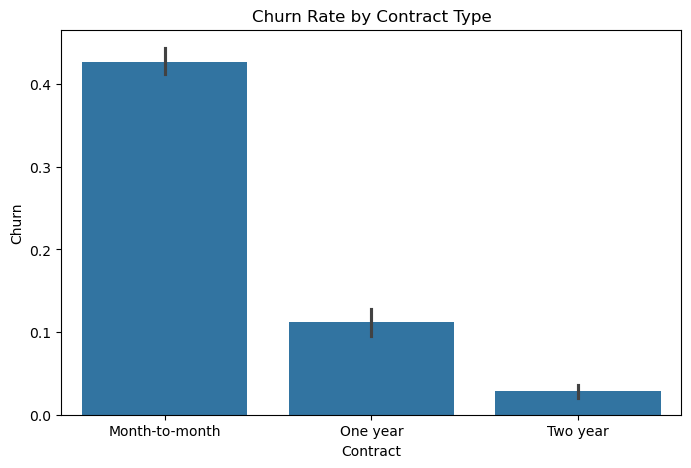

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Contract'], y=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0))
plt.title("Churn Rate by Contract Type")
plt.show()


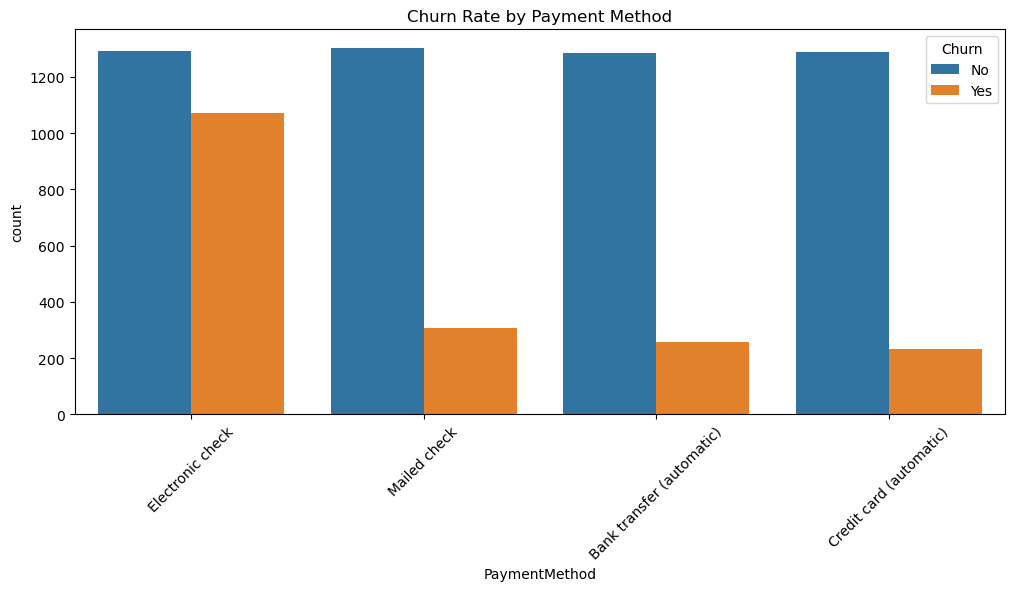

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df['PaymentMethod'], hue=df['Churn'])
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.show()


In [16]:
# detect missing or non-numeric values in TotalCharges 
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
# Converts the TotalCharges column from object (string) to numeric (float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [18]:
# Replace NaN with 0
df['TotalCharges'].fillna(0, inplace=True)  


C:\Users\42077\AppData\Local\Temp\ipykernel_32356\1854949210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [19]:
# Replace Yes and No with 1 and 0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


C:\Users\42077\AppData\Local\Temp\ipykernel_32356\1007394740.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


In [20]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [21]:
#Convert categorical variables into numeric using encoding techniques.

# Convert categorical features using One-Hot Encoding
df = pd.get_dummies(df, columns=[
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
], drop_first=True)  # drop_first=True avoids multicollinearity

# Convert 'Contract' using Ordinal Encoding
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)

# Convert `PaymentMethod` using Integer Encoding (Fixed Mapping)
payment_mapping = {
    'Bank transfer (automatic)': 1,
    'Credit card (automatic)': 2,
    'Electronic check': 3,
    'Mailed check': 4
}
df['PaymentMethod'] = df['PaymentMethod'].map(payment_mapping)

# Ensure all boolean values are converted to 0 and 1
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)

# Ensure `TotalCharges` is numeric (fix potential object dtype issues)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')



In [22]:
# Let's check our dataframe
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,0,1,3,29.85,29.85,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,34,1,1,0,4,56.95,1889.50,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,2,1,0,1,4,53.85,108.15,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,45,0,1,0,1,42.30,1840.75,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,2,1,0,1,3,70.70,151.65,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,4,84.80,1990.50,...,0,0,0,1,0,1,0,1,0,1
7039,0,1,1,72,1,1,1,2,103.20,7362.90,...,0,1,0,1,0,0,0,1,0,1
7040,0,1,1,11,0,0,1,3,29.60,346.45,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,4,1,0,1,4,74.40,306.60,...,0,0,0,0,0,0,0,0,0,0


C:\Users\42077\AppData\Local\Temp\ipykernel_32356\2721361788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')


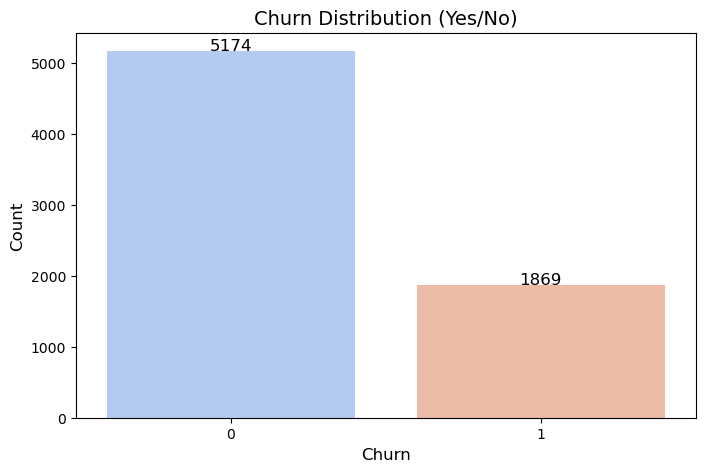

In [23]:
# Count the number of 'Yes'  and 'No' values in the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')

# Add labels and title
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn Distribution (Yes/No)', fontsize=14)

# Display values on bars
for i, value in enumerate(churn_counts.values):
    plt.text(i, value + 10, str(value), ha='center', fontsize=12)

# Show the plot
plt.show()

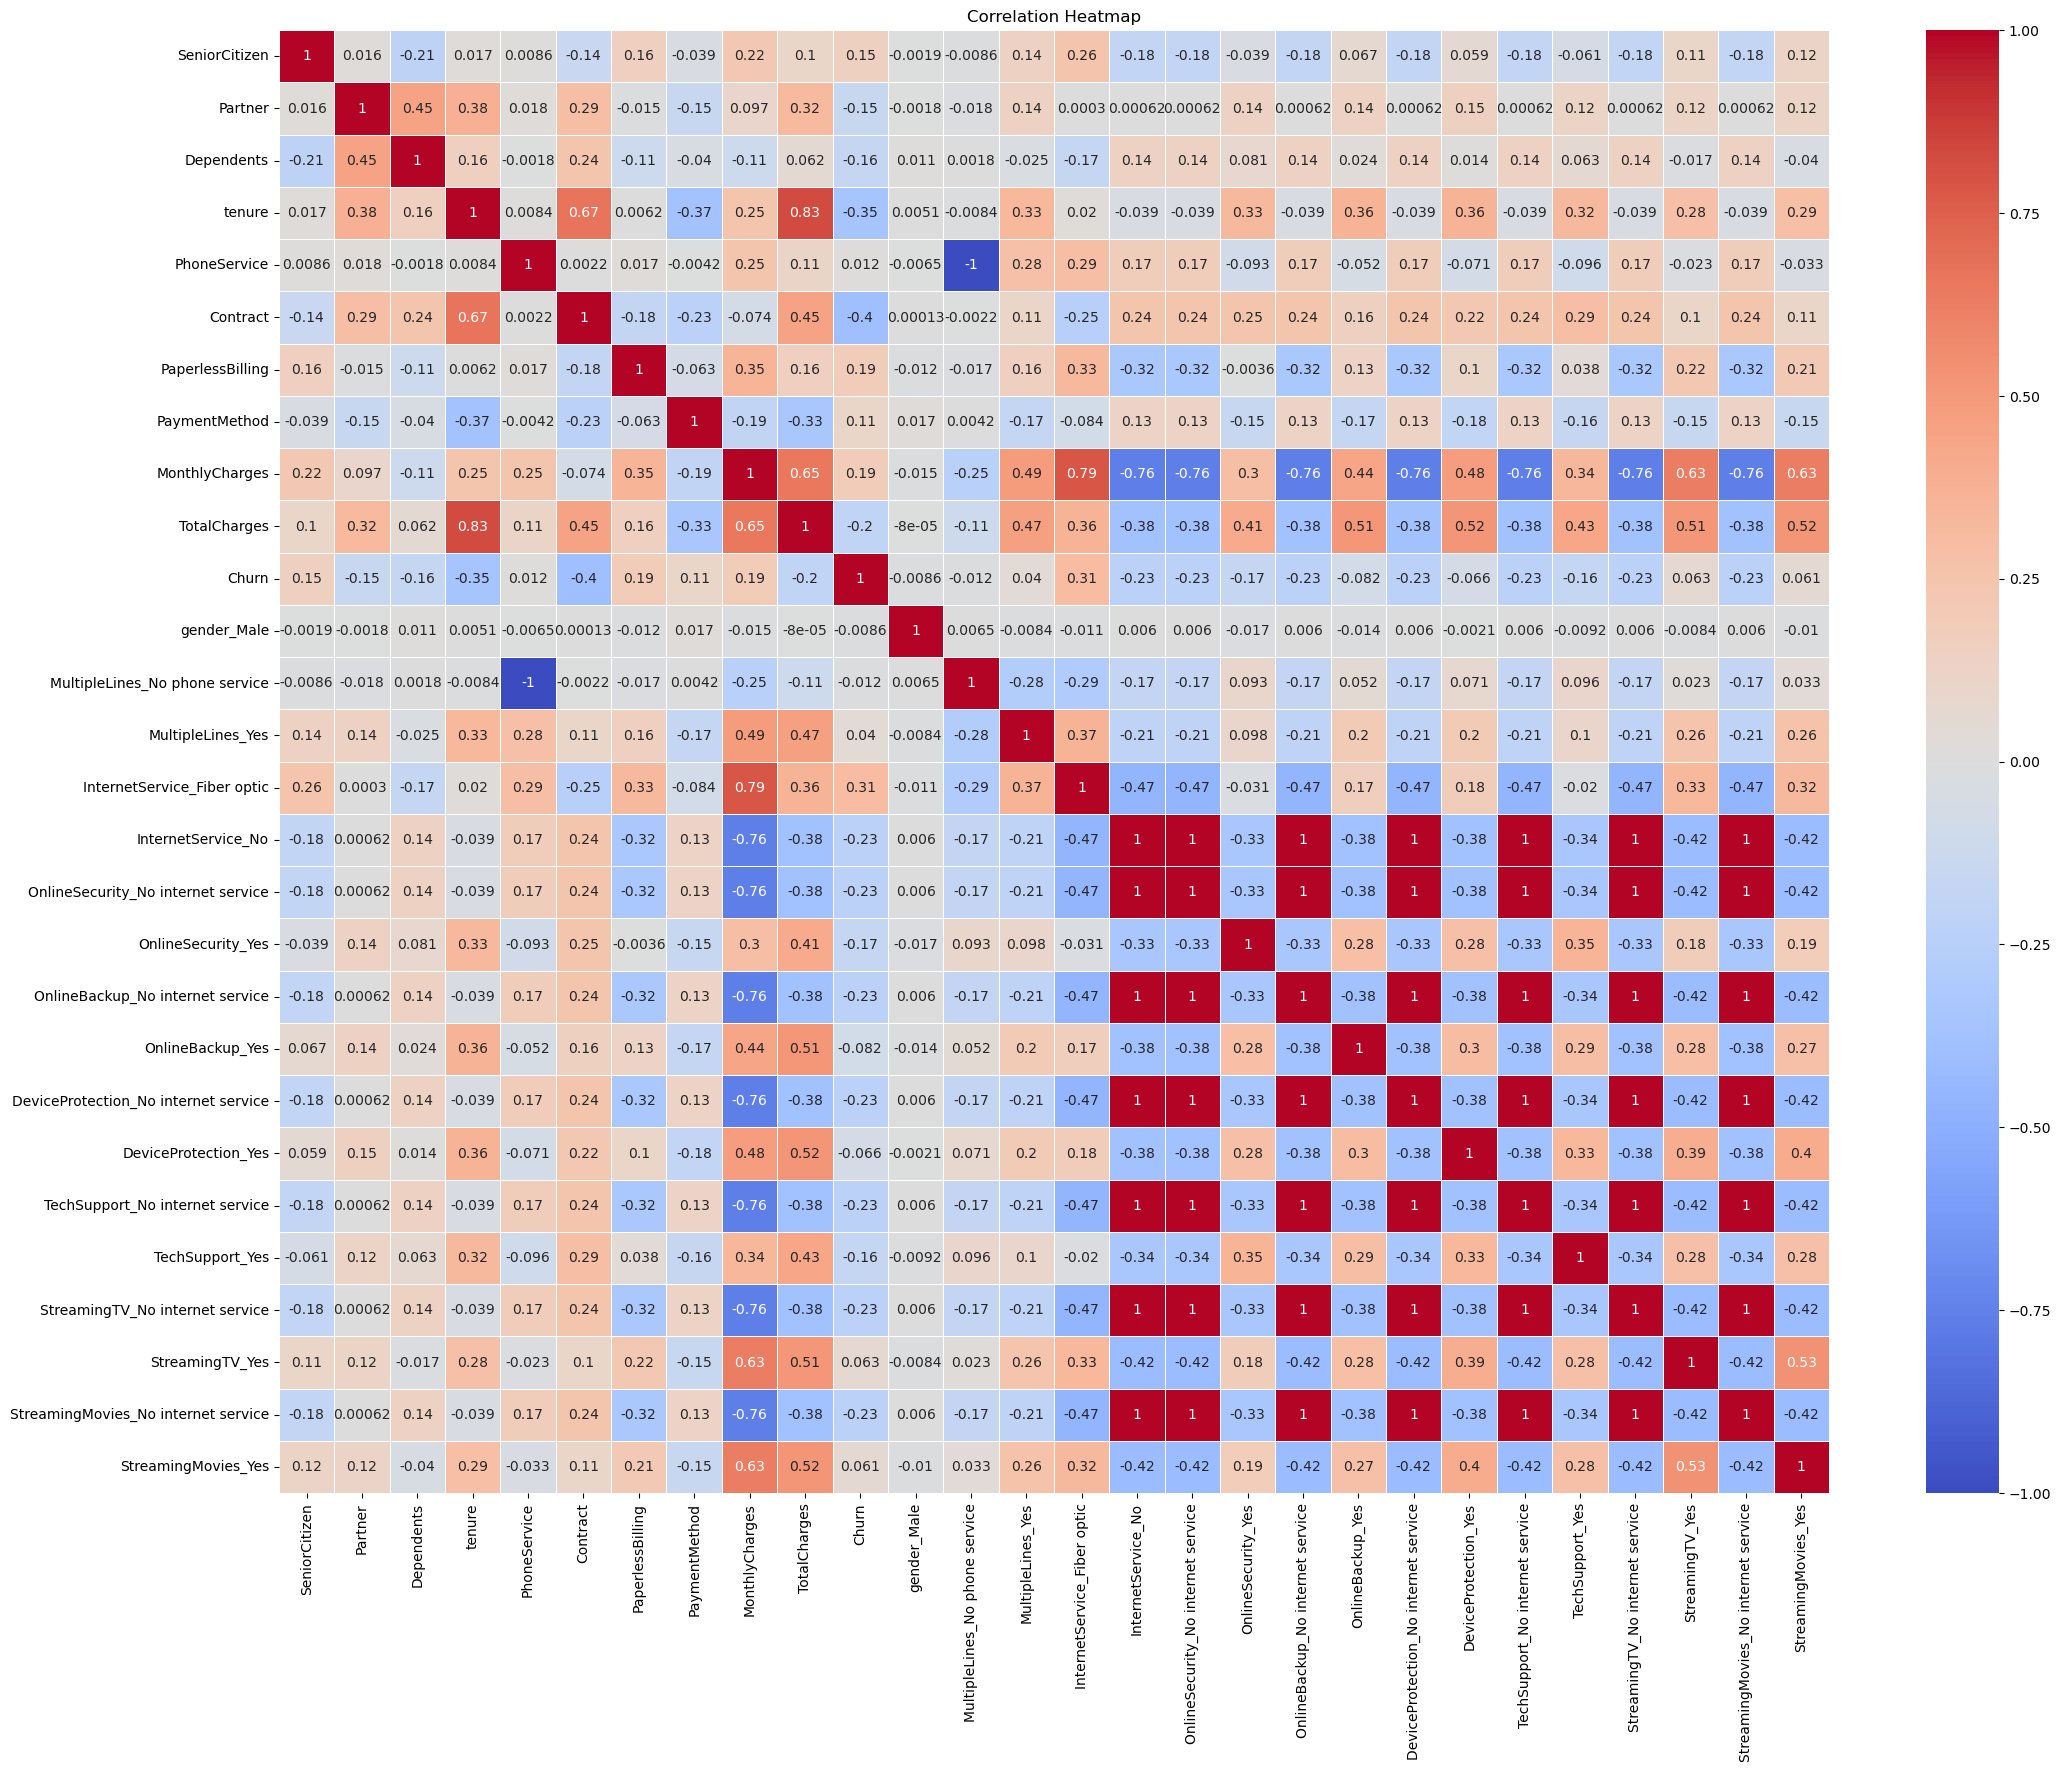

In [24]:
# Compute correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(25, 19))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [25]:
#Measure multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with independent variables
X = df.drop(columns=['Churn'])  # Remove target column

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF scores
print(vif_data.sort_values(by="VIF", ascending=False))


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                 Feature          VIF
25   StreamingMovies_No internet service          inf
23       StreamingTV_No internet service          inf
21       TechSupport_No internet service          inf
19  DeviceProtection_No internet service          inf
17      OnlineBackup_No internet service          inf
15    OnlineSecurity_No internet service          inf
14                    InternetService_No          inf
4                           PhoneService  1775.972849
8                         MonthlyCharges   865.021633
13           InternetService_Fiber optic   148.176757
11        MultipleLines_No phone service    61.405416
26                   StreamingMovies_Yes    24.100697
24                       StreamingTV_Yes    24.045304
9                           TotalCharges    10.600802
3                                 tenure     7.434354
12                     MultipleLines_Yes     7.263039
20                  DeviceProtection_Yes     6.921303
18                      Onli

In [26]:
#Drop columns with high VIF
features_to_drop = [
    # Drop redundant "No internet service" columns
    'StreamingMovies_No internet service', 'StreamingTV_No internet service',
    'TechSupport_No internet service', 'DeviceProtection_No internet service',
    'OnlineBackup_No internet service', 'OnlineSecurity_No internet service',
    'InternetService_No', 'MonthlyCharges',

    # Drop redundant features
    'PhoneService',  # Too high VIF, redundant
    'TotalCharges'  # Correlated with tenure & MonthlyCharges
]

df.drop(columns=features_to_drop, inplace=True)


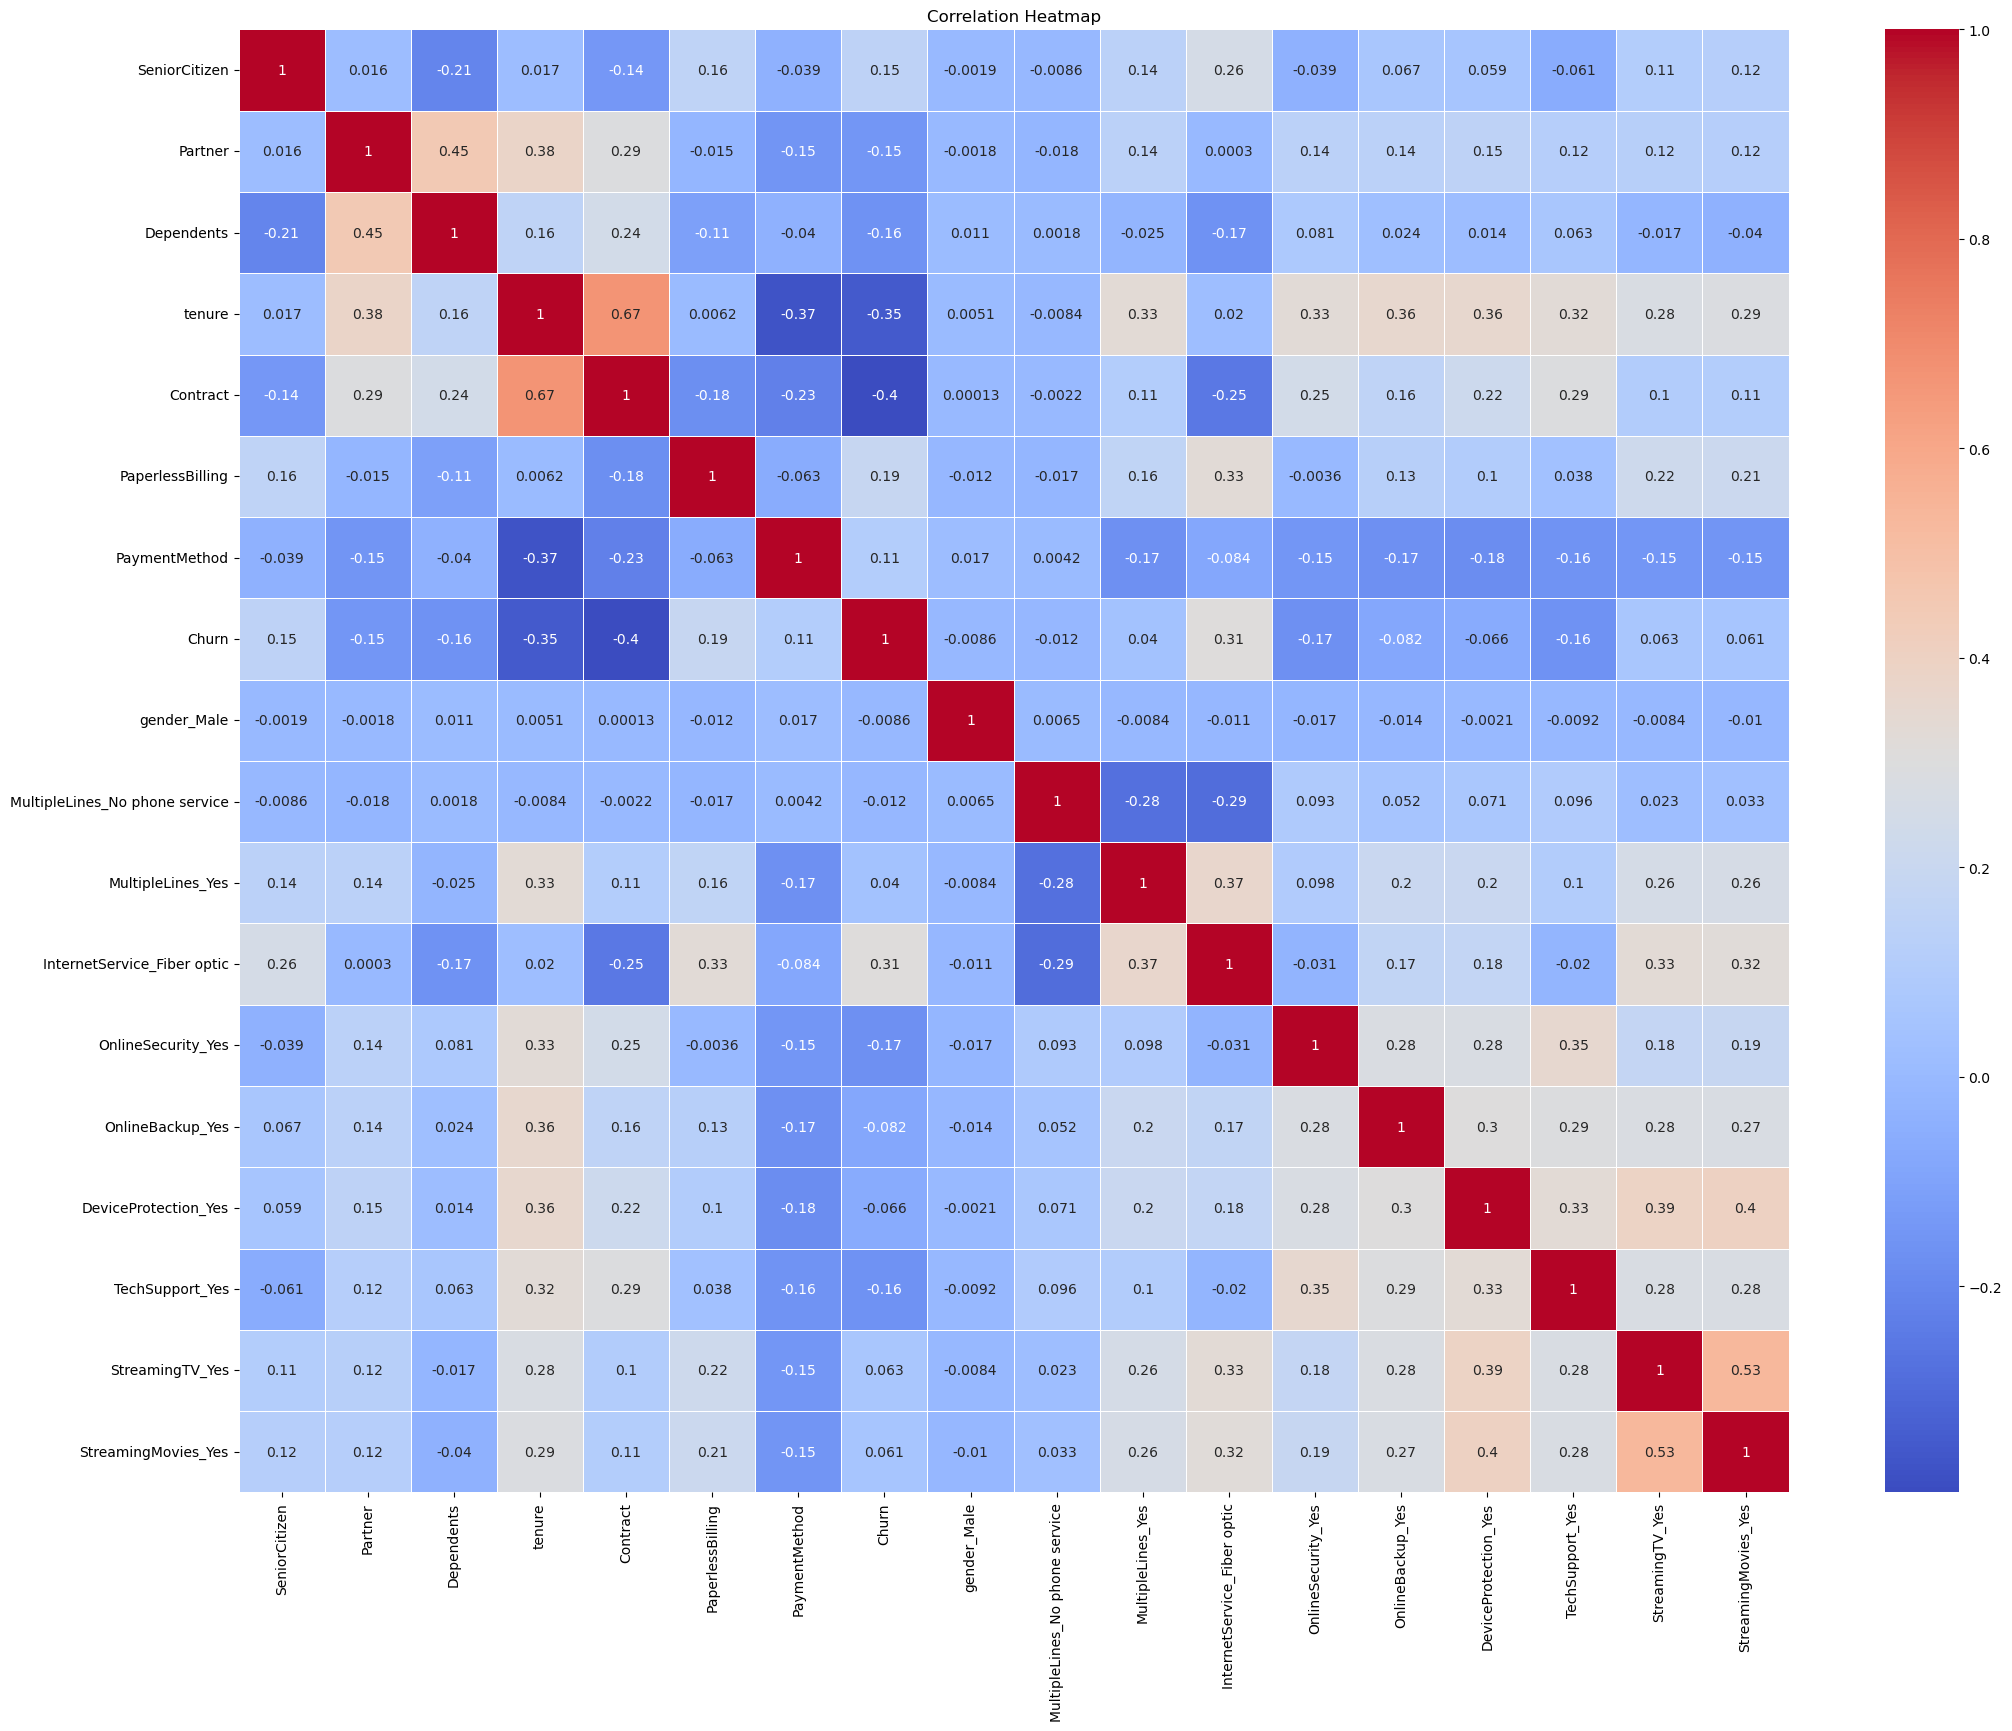

In [27]:
# Compute correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(25, 19))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# check our data frame one more time
df

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,1,0,1,0,1,3,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,34,1,0,4,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,2,0,1,4,1,1,0,0,0,1,1,0,0,0,0
3,0,0,0,45,1,0,1,0,1,1,0,0,1,0,1,1,0,0
4,0,0,0,2,0,1,3,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,4,0,1,0,1,0,1,0,1,1,1,1
7039,0,1,1,72,1,1,2,0,0,0,1,1,0,1,1,0,1,1
7040,0,1,1,11,0,1,3,0,0,1,0,0,1,0,0,0,0,0
7041,1,1,0,4,0,1,4,1,1,0,1,1,0,0,0,0,0,0


In [29]:
df.dtypes

SeniorCitizen                     int64
Partner                           int64
Dependents                        int64
tenure                            int64
Contract                          int64
PaperlessBilling                  int64
PaymentMethod                     int64
Churn                             int64
gender_Male                       int32
MultipleLines_No phone service    int32
MultipleLines_Yes                 int32
InternetService_Fiber optic       int32
OnlineSecurity_Yes                int32
OnlineBackup_Yes                  int32
DeviceProtection_Yes              int32
TechSupport_Yes                   int32
StreamingTV_Yes                   int32
StreamingMovies_Yes               int32
dtype: object

In [30]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    confusion_matrix
)

# Define the model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

# Prepare features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.74
ROC AUC Score: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80      1036
           1       0.50      0.84      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.75      1409

Confusion Matrix:
 [[728 308]
 [ 59 314]]


In [31]:
#Import necessary libraries for data analysis, visualization, and machine learning.
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model again
model.fit(X_train, y_train)

# Predict again and evaluate
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print the new results
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1021
           1       0.76      0.87      0.81      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070

ROC AUC Score: 0.8740472947044384
Accuracy: 0.79


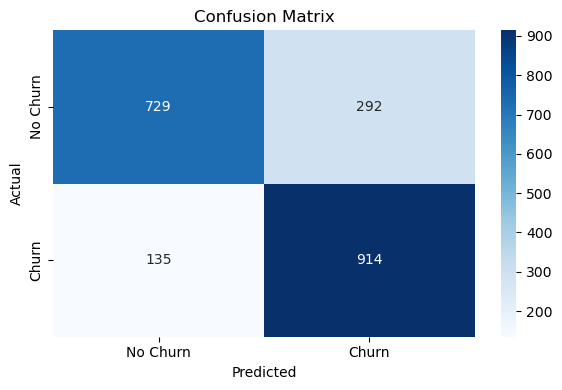

In [72]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [74]:
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')  # Save to current folder
plt.show()


<Figure size 640x480 with 0 Axes>

C:\Users\42077\AppData\Local\Temp\ipykernel_32356\3274644585.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


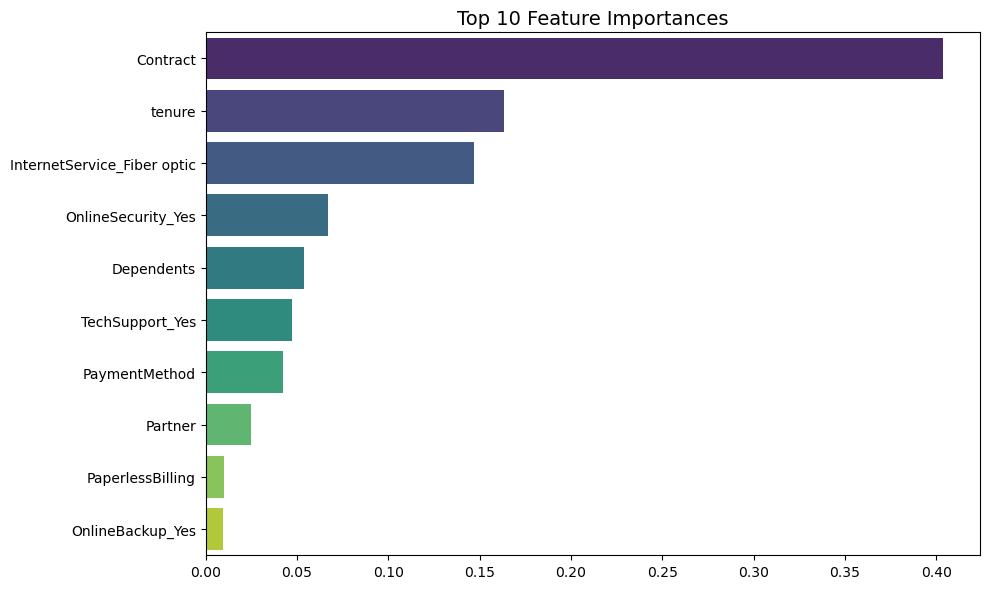

In [70]:
# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.dropna()

# Select top 10 features
top_features = feature_importance.sort_values(ascending=False).head(10)
top_features = top_features[top_features.index.notnull()]

# Plot without axis labels
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Feature Importances", fontsize=14)
plt.xlabel("")  # Remove x-axis label
plt.ylabel("")  # Remove y-axis label
plt.tight_layout()
plt.show()


In [34]:
#deploy
#from joblib import dump

# After training your model
#dump(model, 'churn_model.pkl')
